## Capstone_project

### Project description (Introduction/Business Problem)
In this project, I will use some financial time series to predict the price of BIT/USD. The model will be used is simply a multiple linear regression. 

### Data description
All the data are scraped from yahoo.finance including about 2000 daily records of the following time series: 
1. Bitcoin USD (BTC-USD)
2. Treasury Yield 10 Years (^TNX)
3. CBOE Volatility Index (^VIX)
4. S&P 500 (^GSPC)
5. NASDAQ Composite (^IXIC)

Returns will be calculated.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import time
from pandas.tseries.offsets import BDay

### section1 
bridge_1() is a function to scrape the 100-period(day/week/month) historical data from yahoo.finance.
Only 100 rows of historical data can be scraped every time for yahoo.finance :(
But this problem has been solved by the code in section2.

In [2]:
#start, end, tick, freq

def bridge_1(start, end, tick, freq):
    url = 'https://finance.yahoo.com/quote/'+tick+'/history?period1='\
                      +str(start)+'&period2='+str(end)+'&interval='+freq+'&filter=history&frequency='+freq
    
    source = requests.get(url).text
    
    soup = BeautifulSoup(source, 'lxml')

    table = soup.find('table', class_='W(100%) M(0)') # find the table containing the historical data

# Create the column names.
    names = []
    for th in table.thead.find_all('th'):
        names.append(th.text.strip().rstrip().rstrip('*'))

# Scrape the data and create a DataFrame.
    row = [[]]
    for tr in table.tbody.find_all('tr'):
        try:
            r=[]
            for td in tr.find_all('td'):
                r.append(''.join(td.text.split(','))) #remove the , mark in the values for later converting from str to float
            row.append(r) # append each row
        except:
            pass
    row = row[1:] # slice from 1 row since the 0 row is column names

    df = pd.DataFrame(row, columns=names)
    df['Date'] = pd.to_datetime(df['Date']) # convert str to datetime   
    return df

### section2

Bitcoin USD (BTC-USD)

In [3]:
# set your parameters :)
start = '2010 01 01'
end = '2019 07 24'
tick = 'BTC-USD'
freq = '1d'
days = 2000

# convert the str to datetime
start = datetime.strptime(start, '%Y %m %d')
end = datetime.strptime(end, '%Y %m %d') + BDay(1) # to restore a bug: the latest day is not retrieved in the result.

start = int(time.mktime(start.timetuple())) # convert the datatime to a floating point number 
    
for i in range(int(days/100)):  
    end = int(time.mktime(end.timetuple()))     
    df = bridge_1(start, end, tick, freq)    
    if i == 0:
        df2 = df
    if i > 0:
        df2 = df2.append(df, ignore_index=True)            
    end = datetime.fromtimestamp(end) - BDay(100) # convert the floating point number to datatime and minus 100 bdays 

df2 = df2.drop_duplicates() # due to a unknown bug, some days were scraped more than once, however rarely.  
df2 = df2[['Date','Open','Close']] # remove the unnecessary columns
df2.replace('-', np.nan, inplace=True)
df2.iloc[:,1:]=df2.iloc[:,1:].astype(float)
df2['Return'] = df2.Close/df2.Open - 1
df2 = df2[['Date','Return']]
print(df2.shape)
df2.head()

(2000, 2)


,Date,Return
0,2019-07-24,-0.008322
1,2019-07-23,-0.045683
2,2019-07-22,-0.024638
3,2019-07-21,-0.016052
4,2019-07-20,0.021502


In [4]:
bit = df2

Treasury Yield 10 Years (^TNX)

In [5]:
# set your parameters :)
start = '2010 01 01'
end = '2019 07 24'
tick = '%5ETNX'
freq = '1d'
days = 2000

# convert the str to datetime
start = datetime.strptime(start, '%Y %m %d')
end = datetime.strptime(end, '%Y %m %d')+BDay(1) # to restore a bug: the latest day is not retrieved in the result.

start = int(time.mktime(start.timetuple())) # convert the datatime to a floating point number 
    
for i in range(int(days/100)):  
    end = int(time.mktime(end.timetuple()))     
    df = bridge_1(start, end, tick, freq)    
    if i == 0:
        df2 = df
    if i > 0:
        df2 = df2.append(df, ignore_index=True)            
    end = datetime.fromtimestamp(end)-BDay(100) # convert the floating point number to datatime and minus 100 bdays 

df2 = df2.drop_duplicates() # due to a unknown bug, some days were scraped more than once, however rarely.  
df2 = df2[['Date','Open','Close']] # remove the unnecessary columns
df2.replace('-', np.nan, inplace=True)
# df2[df2['Open'].str.contains('-') | df2['Close'].str.contains('-')].index[0]
df2.iloc[:,1:]=df2.iloc[:,1:].astype(float)
df2['Return'] = df2.Close/df2.Open-1
df2 = df2[['Date','Return']]
print(df2.shape)
df2.head()

(1932, 2)


,Date,Return
0,2019-07-24,-0.000975
1,2019-07-23,0.012695
2,2019-07-22,-0.003415
3,2019-07-19,0.000489
4,2019-07-18,-0.010199


In [6]:
treasury_yield10 = df2

CBOE Volatility Index (^VIX)

In [7]:
# set your parameters :)
start = '2010 01 01'
end = '2019 07 24'
tick = '%5EVIX'
freq = '1d'
days = 2000

# convert the str to datetime
start = datetime.strptime(start, '%Y %m %d')
end = datetime.strptime(end, '%Y %m %d')+BDay(1) # to restore a bug: the latest day is not retrieved in the result.

start = int(time.mktime(start.timetuple())) # convert the datatime to a floating point number 
    
for i in range(int(days/100)):  
    end = int(time.mktime(end.timetuple()))     
    df = bridge_1(start, end, tick, freq)    
    if i == 0:
        df2 = df
    if i > 0:
        df2 = df2.append(df, ignore_index=True)            
    end = datetime.fromtimestamp(end)-BDay(100) # convert the floating point number to datatime and minus 100 bdays 

df2 = df2.drop_duplicates() # due to a unknown bug, some days were scraped more than once, however rarely.  
df2 = df2[['Date','Open','Close']] # remove the unnecessary columns
df2.replace('-', np.nan, inplace=True)
df2.iloc[:,1:]=df2.iloc[:,1:].astype(float)
df2['Return'] = df2.Close/df2.Open-1
df2 = df2[['Date','Return']]
print(df2.shape)
df2.head()

(1932, 2)


,Date,Return
0,2019-07-24,-0.057031
1,2019-07-23,-0.060358
2,2019-07-22,-0.070103
3,2019-07-19,0.085650
4,2019-07-18,-0.063668


In [8]:
vix = df2

S&P 500 (^GSPC)

In [9]:
# set your parameters :)
start = '2010 01 01'
end = '2019 07 24'
tick = '%5EGSPC'
freq = '1d'
days = 2000

# convert the str to datetime
start = datetime.strptime(start, '%Y %m %d')
end = datetime.strptime(end, '%Y %m %d')+BDay(1) # to restore a bug: the latest day is not retrieved in the result.

start = int(time.mktime(start.timetuple())) # convert the datatime to a floating point number 
    
for i in range(int(days/100)):  
    end = int(time.mktime(end.timetuple()))     
    df = bridge_1(start, end, tick, freq)    
    if i == 0:
        df2 = df
    if i > 0:
        df2 = df2.append(df, ignore_index=True)            
    end = datetime.fromtimestamp(end)-BDay(100) # convert the floating point number to datatime and minus 100 bdays 

df2 = df2.drop_duplicates() # due to a unknown bug, some days were scraped more than once, however rarely.  
df2 = df2[['Date','Open','Close']] # remove the unnecessary columns
df2.replace('-', np.nan, inplace=True)
df2.iloc[:,1:]=df2.iloc[:,1:].astype(float)
df2['Return'] = df2.Close/df2.Open-1
df2 = df2[['Date','Return']]
print(df2.shape)
df2.head()

(1932, 2)


,Date,Return
0,2019-07-24,0.006933
1,2019-07-23,0.003583
2,2019-07-22,0.001040
3,2019-07-19,-0.009204
4,2019-07-18,0.005452


In [10]:
sp500 = df2

NASDAQ Composite (^IXIC)

In [11]:
# set your parameters :)
start = '2010 01 01'
end = '2019 07 24'
tick = '%5EIXIC'
freq = '1d'
days = 2000

# convert the str to datetime
start = datetime.strptime(start, '%Y %m %d')
end = datetime.strptime(end, '%Y %m %d')+BDay(1) # to restore a bug: the latest day is not retrieved in the result.

start = int(time.mktime(start.timetuple())) # convert the datatime to a floating point number 
    
for i in range(int(days/100)):  
    end = int(time.mktime(end.timetuple()))     
    df = bridge_1(start, end, tick, freq)    
    if i == 0:
        df2 = df
    if i > 0:
        df2 = df2.append(df, ignore_index=True)            
    end = datetime.fromtimestamp(end)-BDay(100) # convert the floating point number to datatime and minus 100 bdays 

df2 = df2.drop_duplicates() # due to a unknown bug, some days were scraped more than once, however rarely.  
df2 = df2[['Date','Open','Close']] # remove the unnecessary columns
df2.replace('-', np.nan, inplace=True)
df2.iloc[:,1:]=df2.iloc[:,1:].astype(float)
df2['Return'] = df2.Close/df2.Open-1
df2 = df2[['Date','Return']]
print(df2.shape)
df2.head()

(1932, 2)


,Date,Return
0,2019-07-24,0.011442
1,2019-07-23,0.001080
2,2019-07-22,0.003934
3,2019-07-19,-0.011509
4,2019-07-18,0.006806


In [12]:
nasdaq = df2

Merge all the series into one set

In [13]:
df3 = bit.merge(treasury_yield10, on='Date').merge(vix, on='Date')\
    .merge(sp500, on='Date').merge(nasdaq, on='Date')

In [14]:
df3.columns = ['Date','BIT/USD','T_yield10','VIX','SP500','Nasdaq']

In [15]:
from scipy import stats
from sklearn import preprocessing 

df3.dropna(inplace=True) #drop the missing values
print(df3.shape)

df4 = preprocessing.StandardScaler().fit(df3.iloc[:,1:]).transform(df3.iloc[:,1:]) #normalization
df4 = pd.DataFrame(df4)
print(df4.shape)

df4 = pd.concat([df3[['Date']],df4], axis=1, join='inner', ignore_index=True) 
print(df4.shape)

df4.columns = ['Date','BIT/USD','T_yield10','VIX','SP500','Nasdaq']
df4.head()

(1389, 6)
(1389, 5)
(1388, 6)


,Date,BIT/USD,T_yield10,VIX,SP500,Nasdaq
0,2019-07-24,-0.133735,-0.047081,-0.812711,0.916496,1.409543
1,2019-07-23,-0.490299,0.833123,-0.863676,0.461426,0.101935
2,2019-07-22,-0.289452,-0.204191,-1.012988,0.115922,0.462121
3,2019-07-19,-0.148872,0.047132,1.373350,-1.275574,-1.486597
4,2019-07-18,0.873084,-0.641041,-0.914392,0.715293,0.824492


In [16]:
df4.boxplot()

In [17]:
# remove the outliers
df4 = df4[ (df4['T_yield10']<3) & (df4['VIX']<3) & (df4['SP500']<3) & (df4['Nasdaq']<3) & (df4['BIT/USD']<3) ]
print(df4.shape)

(1341, 6)


In [18]:
df4.boxplot()

In [19]:
X = df4[['T_yield10','VIX','SP500','Nasdaq']]
print(X.shape)
X.head()

(1341, 4)


,T_yield10,VIX,SP500,Nasdaq
0,-0.047081,-0.812711,0.916496,1.409543
1,0.833123,-0.863676,0.461426,0.101935
2,-0.204191,-1.012988,0.115922,0.462121
3,0.047132,1.373350,-1.275574,-1.486597
4,-0.641041,-0.914392,0.715293,0.824492


In [20]:
y = df4[['BIT/USD']]
print(y.shape)
y.head()

(1341, 1)


,BIT/USD
0,-0.133735
1,-0.490299
2,-0.289452
3,-0.148872
4,0.873084


### section3

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df4.corr()

,BIT/USD,T_yield10,VIX,SP500,Nasdaq
BIT/USD,1.000000,0.012101,0.011591,-0.055449,-0.011020
T_yield10,0.012101,1.000000,-0.135195,0.245889,0.196545
VIX,0.011591,-0.135195,1.000000,-0.618184,-0.681143
SP500,-0.055449,0.245889,-0.618184,1.000000,0.788400
Nasdaq,-0.011020,0.196545,-0.681143,0.788400,1.000000


As can be seen from the correlation matrix, there is no strong correlation between the BIT/USE and the others. 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


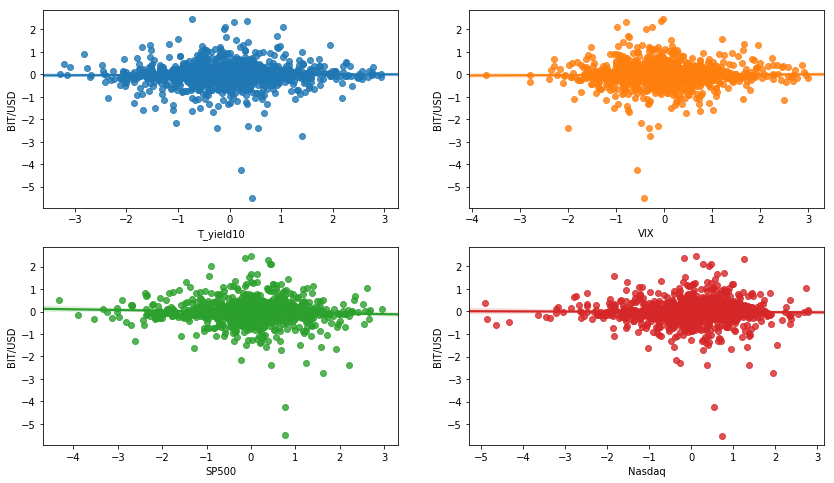

In [23]:

fig = plt.figure(figsize=(14, 8))

ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

sns.regplot(x='T_yield10', y='BIT/USD', data=df4, ax=ax0)
sns.regplot(x='VIX', y='BIT/USD', data=df4, ax=ax1)
sns.regplot(x='SP500', y='BIT/USD', data=df4, ax=ax2)
sns.regplot(x='Nasdaq', y='BIT/USD', data=df4, ax=ax3)


There correlation observed from the charts. 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
X_train.head()

,T_yield10,VIX,SP500,Nasdaq
510,-0.420617,1.905003,-1.572728,-1.813357
376,-0.668737,-0.715574,0.392985,0.416110
10,-1.210209,-1.377287,0.146021,0.263909
857,0.929201,-0.762883,0.008029,0.794584
826,-0.832951,0.499571,-0.512631,0.419166


Linear Regression model

In [26]:
lre=LinearRegression()

In [27]:
lre.fit(X_train[['T_yield10']], y_train)
lre.score(X_test[['T_yield10']], y_test)

-0.004269677406289363

In [28]:
lre.fit(X_train[['VIX']], y_train)
lre.score(X_test[['VIX']], y_test)

-0.0031420271417628154

In [29]:
lre.fit(X_train[['SP500']], y_train)
lre.score(X_test[['SP500']], y_test)

-0.005178741417809052

In [30]:
lre.fit(X_train[['Nasdaq']], y_train)
lre.score(X_test[['Nasdaq']], y_test)

-0.004899490946022711

In [31]:
lre.fit(X_train, y_train)
yhat_test = lre.predict(X_test)

In [32]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


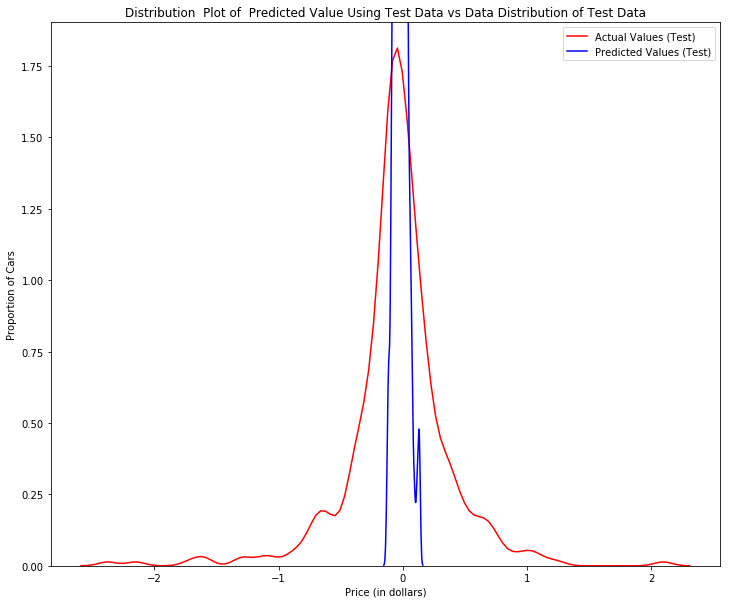

In [33]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

### Result and conclusion (for MLR)

As can be seen, the multiple linear regression performed pretty badly. There maybe two reason: one is the poor predictability of the features; the onther one is the poor performance of the MLR model. 

Further features and models should be considered and searched. 

### K nearest neighbor (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [35]:
df5 = df4.copy()

In [36]:
df5.loc[df5['BIT/USD']>=0,'BIT/USD']=1
df5.loc[df5['BIT/USD']<0,'BIT/USD']=0

In [37]:
df5['BIT/USD'].value_counts()

0.0    758
1.0    583
Name: BIT/USD, dtype: int64

In [38]:
X = df5[['T_yield10','VIX','SP500','Nasdaq']]
y = df5[['BIT/USD']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Calculate the accuracy of KNN for different Ks.

In [39]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([0.52109181, 0.53598015, 0.49379653, 0.53101737, 0.48138958,
       0.51116625, 0.51612903, 0.53349876, 0.52853598])

Plot model accuracy for Different number of Neighbors

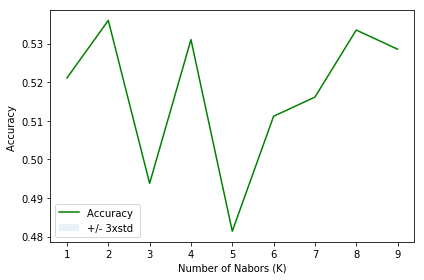

In [40]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [41]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5359801488833746 with k= 2


### Result 

In [42]:
# write your code here

k =2
neigh2 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat2 = neigh2.predict(X_test)
print('Train set accuracy: ', metrics.accuracy_score(y_train, neigh2.predict(X_train)))
print('Test set accuracy: ', metrics.accuracy_score(y_test, yhat2))


Train set accuracy:  0.7494669509594882
Test set accuracy:  0.5359801488833746


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


### Conlusion (for KNN)
The 2-KNN model seems not bad from the result. Further exploration should be conducted.

NOTE: to be honest, I am not happy with this work. But my subscription will be due soon...